## Legal and regulatory maps

In [2]:
# IMPORTS
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondr\\Documents\\GitHub\\DahlkeLab_LAWR\\Src\\func_ko.py'>

### Plot selected aquifers and streams

In [23]:
# Aquifers to plot and dataset to use
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_usgs = gpd.read_file('ShapeFiles/Aquifers_USGS/us_aquifers.shp')
streams = gpd.read_file('ShapeFiles/Streams_US/us_streams.shp')
counties_us = gpd.read_file('ShapeFiles/Counties_US/cb_2018_us_county_20m.shp')

aquifers = cl.ALL_AQUIFERS
range = 30
quantile = 90

# Metric to be plotted where metrics are column names from the dataset
metric = 'inter_annual%'
# True if you want to show HUC4 boundaries (significantly increases runtime)
show_huc4 = False
show_gauges = False
# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True
# True if you want a context basemap (adds runtime)
basemap = False

try:
    dataset = f'Prelim_Data/National_Metrics_{range}_{quantile}.xlsx'
    df = pd.read_excel(dataset, sheet_name='site_metrics', dtype=fn.DATASET_DTYPES)
    df, _ = fn.filter_by_valid(df)
except Exception as e:
    df = None
    print(e)

module 'Src.func_ko' has no attribute 'DATASET_DTYPES'


In [24]:
#aq_usgs['AQ_NAME'].unique()
aq_name_list = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system',
                'Columbia Plateau basaltic-rock aquifers',
                'Rio Grande aquifer system',
                'Mississippi embayment aquifer system',
                'Cambrian-Ordovician aquifer system',
                'Southeastern Coastal Plain aquifer system',
                'Biscayne aquifer',
                'Edwards-Trinity aquifer system',
                'Northern Rocky Mountains Intermontane Basins aquifer system',
                'Piedmont and Blue Ridge crystalline-rock aquifers',
                'Surficial aquifer system',
                'Valley and Ridge aquifers',
                'Silurian-Devonian aquifers',
                'Pacific Northwest basin-fill aquifers',
                'Willamette Lowland basin-fill aquifers',
                'Lower Cretaceous aquifers']

In [27]:
aq_usgs_selected = aq_usgs.loc[aq_usgs['AQ_NAME'].isin(aq_name_list)]
aq_usgs_selected.to_file('ShapeFiles/Aquifers_USGS_25', driver='ESRI Shapefile')

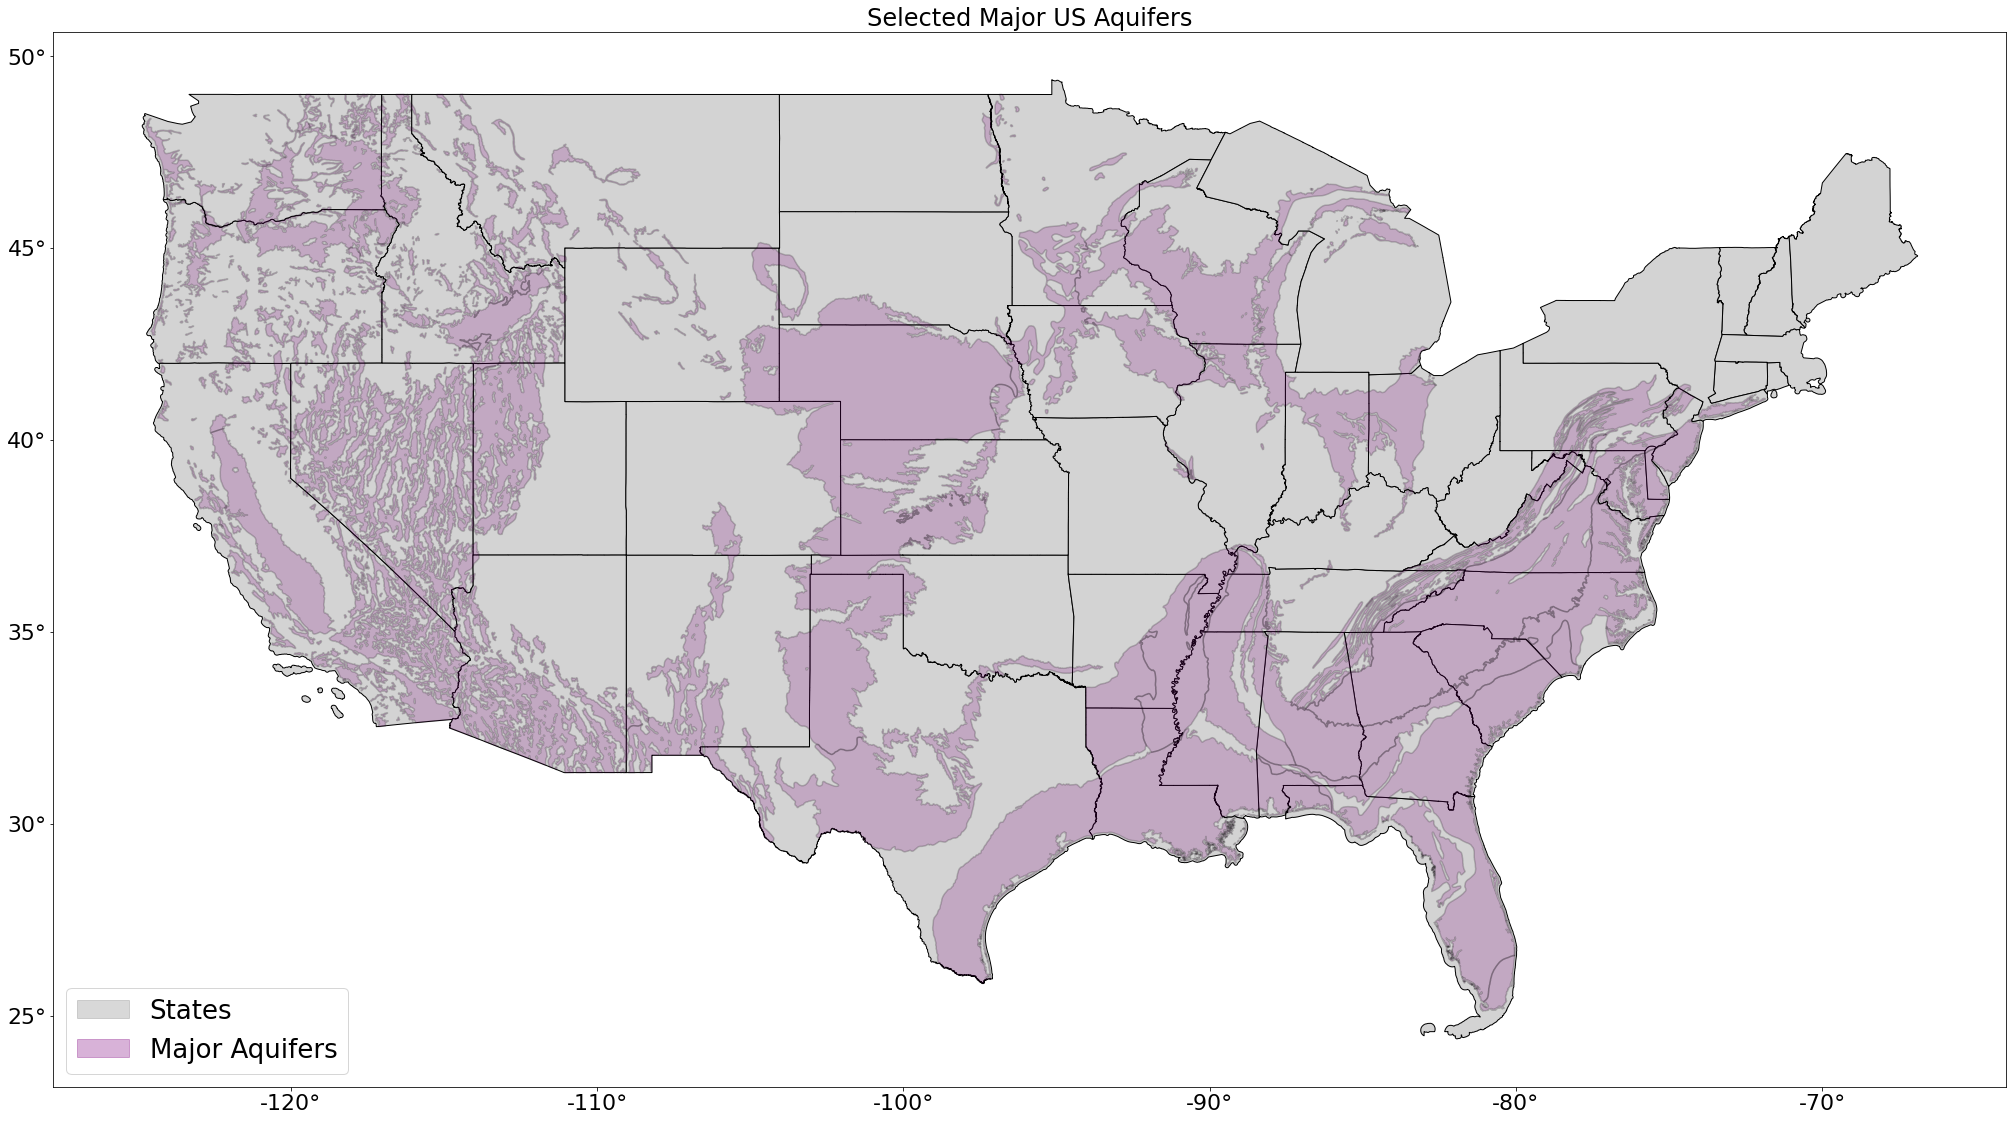

In [26]:
fig, ax = plt.subplots(figsize=(35, 35))
#plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
plt.title(f'Selected Major US Aquifers', fontsize=24)

# Lower-48 Plot
if not basemap:       
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  
    
# Plot counties
#counties_us = counties_us.to_crs(epsg=4269)
#counties_us = counties_us.to_crs('ESRI:102003')
#counties_plot = counties_us.plot(ax=ax, edgecolor='white', facecolor='none', alpha = 0.5, legend=True)

# Merge all dataframes so we can accurately track min/max values for colorbar scaling
# Additonally, plot HUC4 and aquifer boundaries
# aq_names = [aq.name for aq in aquifers]
# aq_gdf = aq_shape[aq_shape['aq_name'].isin(aq_names)]
# aq_gdf = aq_gdf.to_crs(epsg=4269)
# #aq_gdf = aq_gdf.to_crs('ESRI:102003')
# aq_gdf.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

aq_usgs_selected = aq_usgs_selected.to_crs(epsg=4269)
aq_usgs_selected.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

if show_huc4:
    for aq in aquifers:
        fn.plot_huc4(ax, huc4_shape, codes=aq.huc4s)
        
# Plot streams
#streams_plot = streams.plot(ax=ax, edgecolor='blue', facecolor='blue', alpha = 0.5, legend=True)
              
# Water Gauges Plot if there are points to plot. Only plotting points in HUC4s overlapping aquifers
# if not df.empty and show_gauges:
#     # L/B/W/H
#     cax = fig.add_axes([0.17, 0.35, 0.22, 0.015])
    
#     huc_codes = set(huc4 for obj in aquifers for huc4 in obj.huc4s)
#     df_all_aq = df[df['huc4_code'].isin(huc_codes)]    
#     df_all_aq = df_all_aq.reset_index(drop=True)    
#     cmap, mappable = fn.scale_colorbar(df_all_aq, metric)
#     geo_df = fn.convert_geometry(df_all_aq)
#     bx = geo_df.plot(ax=ax, column=df_all_aq[metric], markersize=200, marker='.', cmap='plasma', edgecolor='black', linewidth=1, alpha=0.75)

#     # Colorbar setup
#     cbx = plt.colorbar(mappable, cax=cax, pad=1.0, shrink=0.5, orientation='horizontal', alpha=1.0)
#     cbx.set_label(fn.FLOW_METRIC_UNITS[metric], size=18)
#     cbx.ax.tick_params(labelsize=16)  
#     ax.set_yticks([])
#     ax.set_xticks([])

if basemap:
    fn.plot_basemap(ax)
    
# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='grey', alpha=0.3), 
                Patch(color='purple', alpha=0.3)])  # Add the handle for legend
labels.extend(['States', 'Major Aquifers'])  # Add the label for legend
#legend = ax.get_legend()
ax.legend(handles, labels, loc='lower left', fontsize=26)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
#ax.axis("off")

# Save images if they don't exist or if overwrite is True
if save_img:
    img_path = f'Saved_Visuals/aquifer_map.png'
    fn.save_plot_as_image(img_path, overwrite)    

In [63]:
# Calculate percentage of aquifer in each state
from geopandas.tools import sjoin

lower48 = lower48.to_crs(epsg=4269)
aq_gdf = aq_gdf.to_crs(epsg=4269)

lower48['g1'] = lower48.geometry #The geometry column is lost in the sjoin
aq_shape['g2'] = aq_shape.geometry 

#Spatial join the dataframe to then only intersect the intersecting geometries
#inter = lower48.sjoin(aq_shape)
inter = gpd.sjoin(lower48, aq_shape)
inter.columns
#Index(['id1', 'geometry', 'original_area', 'index_right', 'id2'], dtype='object')

def overlap_pct(frame):
    """A function to calculate overlap percentage"""
    interpct = 100*frame.g1.intersection(frame.g2).area/frame.g1.area
    return interpct

inter['pct'] = inter.apply(overlap_pct, axis=1)
#inter.columns
#Index(['id1', 'geometry', 'g1', 'index_right', 'id2', 'g2', 'pct'], dtype='object')

#Merge the intersect result and the input dataframe
result = pd.merge(inter, lower48, on='STUSPS',how='outer').set_geometry('geometry_y').rename_geometry('geometry')

result = result[['STUSPS','aq_name','pct','geometry']]
#result[0:30]

In [29]:
from geopandas import GeoDataFrame

# Assuming gdf is your GeoDataFrame
lower48_df = lower48.drop(columns='geometry')  # Remove geometry column
lower48_df.to_excel('lower48_df.xlsx', index=False)  # Export DataFrame to Excel

In [37]:
lower48_df_edit = pd.read_excel('lower48_df_edit.xlsx')
lower48_wr = GeoDataFrame(lower48_df_edit, geometry=lower48.geometry)

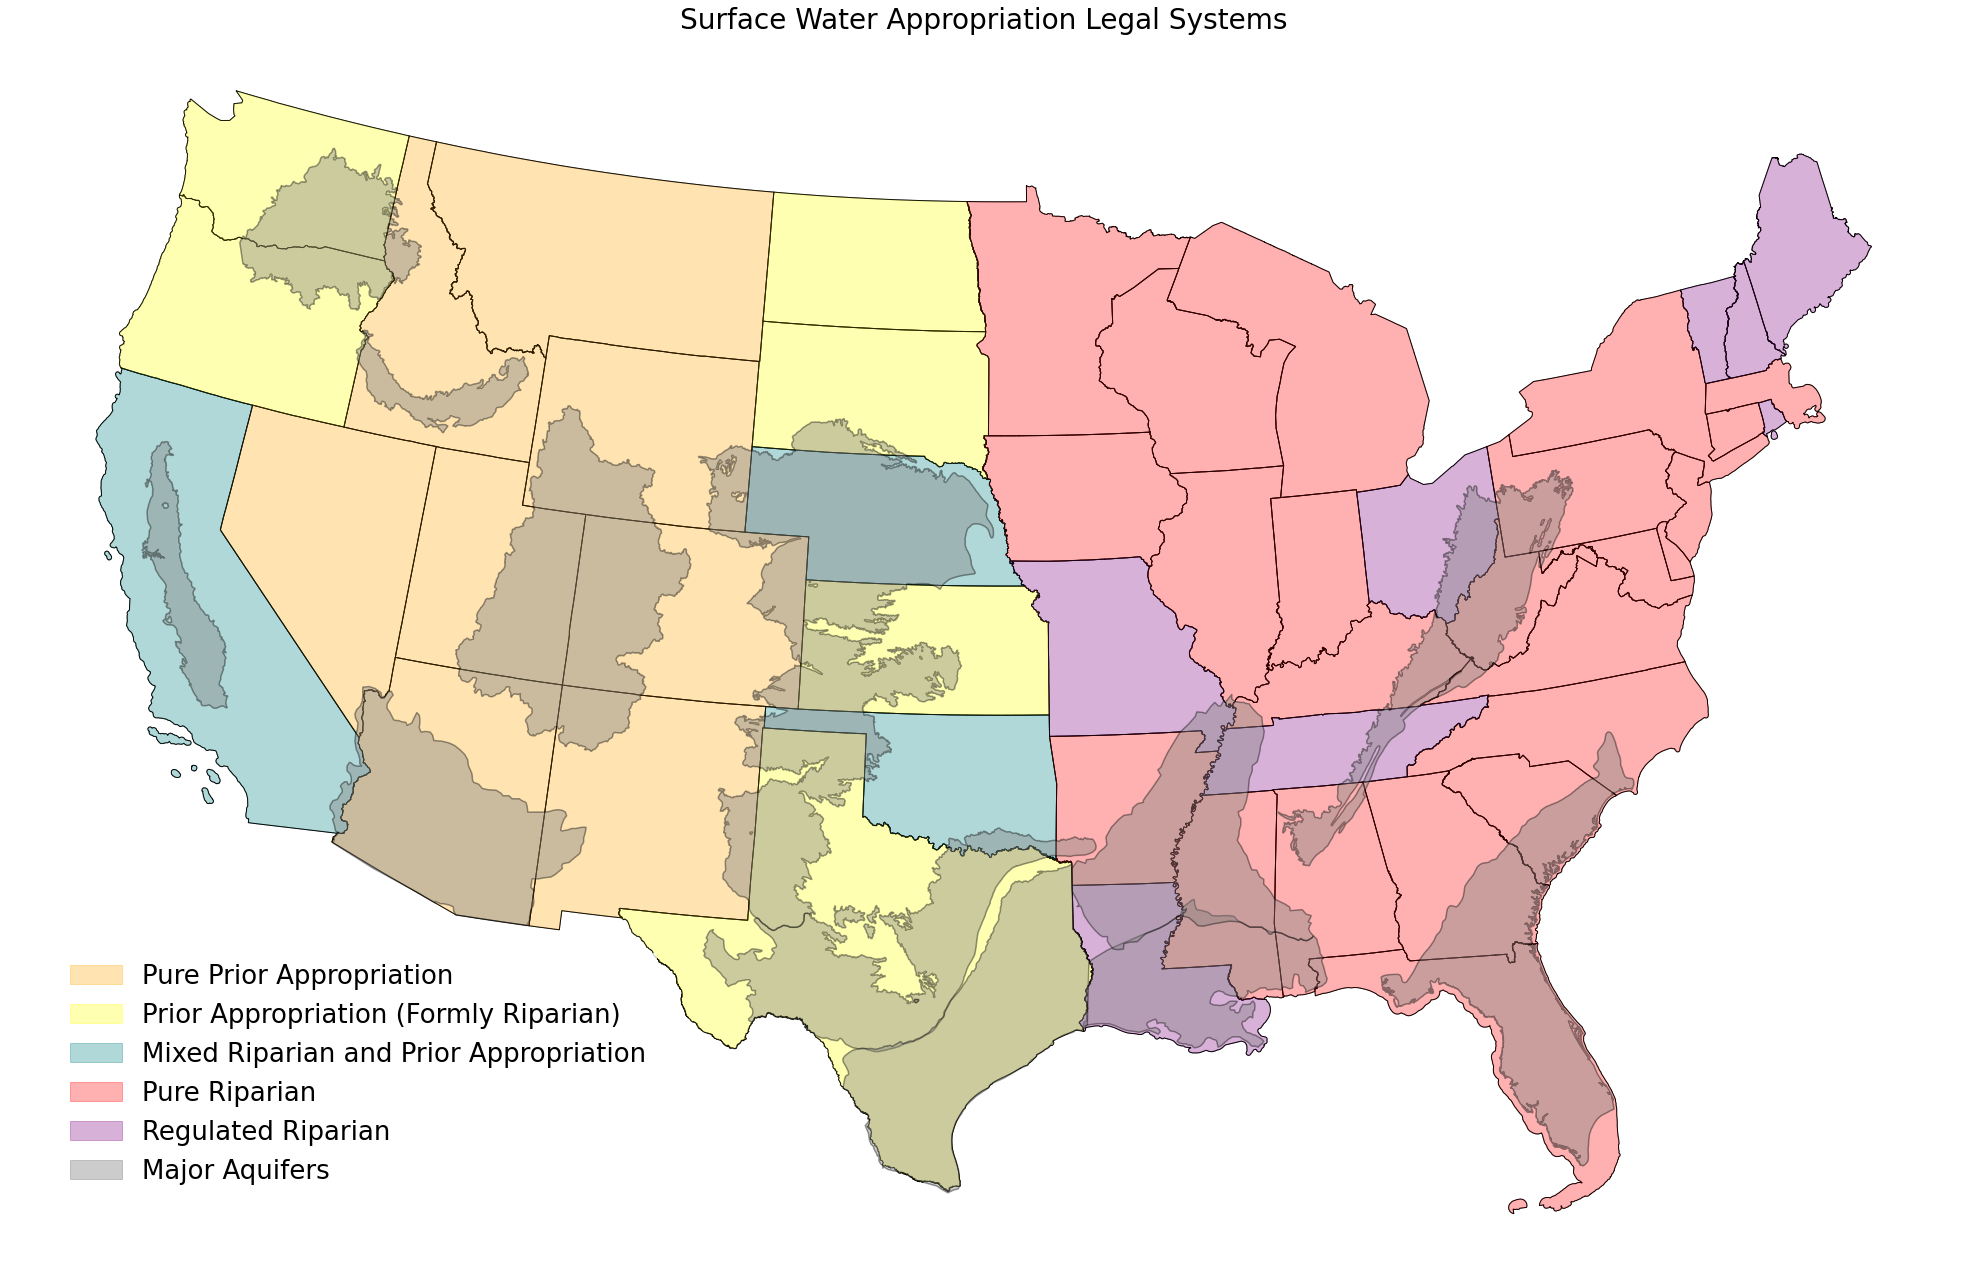

In [82]:
lower48_wr = lower48_wr.to_crs('ESRI:102003')
aq_gdf = aq_gdf.to_crs('ESRI:102003')

fig, ax = plt.subplots(figsize=(35, 35))
plt.title('Surface Water Appropriation Legal Systems', fontsize=28)

lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0)  

lower48_wr[lower48_wr['sw_right'] == 'app'].plot(facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['sw_right'] == 'app_new'].plot(facecolor='yellow', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['sw_right'] == 'mixed'].plot(facecolor='teal', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['sw_right'] == 'reg_rip'].plot(facecolor='red', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['sw_right'] == 'pure_rip'].plot(facecolor='purple', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())

aq_gdf.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='orange', alpha=0.3), 
                Patch(color='yellow', alpha=0.3),
                Patch(color='teal', alpha=0.3),
                Patch(color='red', alpha=0.3),
                Patch(color='purple', alpha=0.3),
                Patch(color='grey', alpha=0.4)])  # Add the handle for legend
labels.extend(['Pure Prior Appropriation', 'Prior Appropriation (Formly Riparian)', 'Mixed Riparian and Prior Appropriation',
                'Pure Riparian', 'Regulated Riparian', 'Major Aquifers'])  # Add the label for legend
#legend = ax.get_legend()
legend = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.02, 0.05), fontsize=26)
frame = legend.get_frame()  # Get the legend frame
frame.set_linewidth(0)

ax.axis("off")

img_path = f'Saved_Visuals/sw_rights_map.png'
fn.save_plot_as_image(img_path, overwrite)

plt.show()

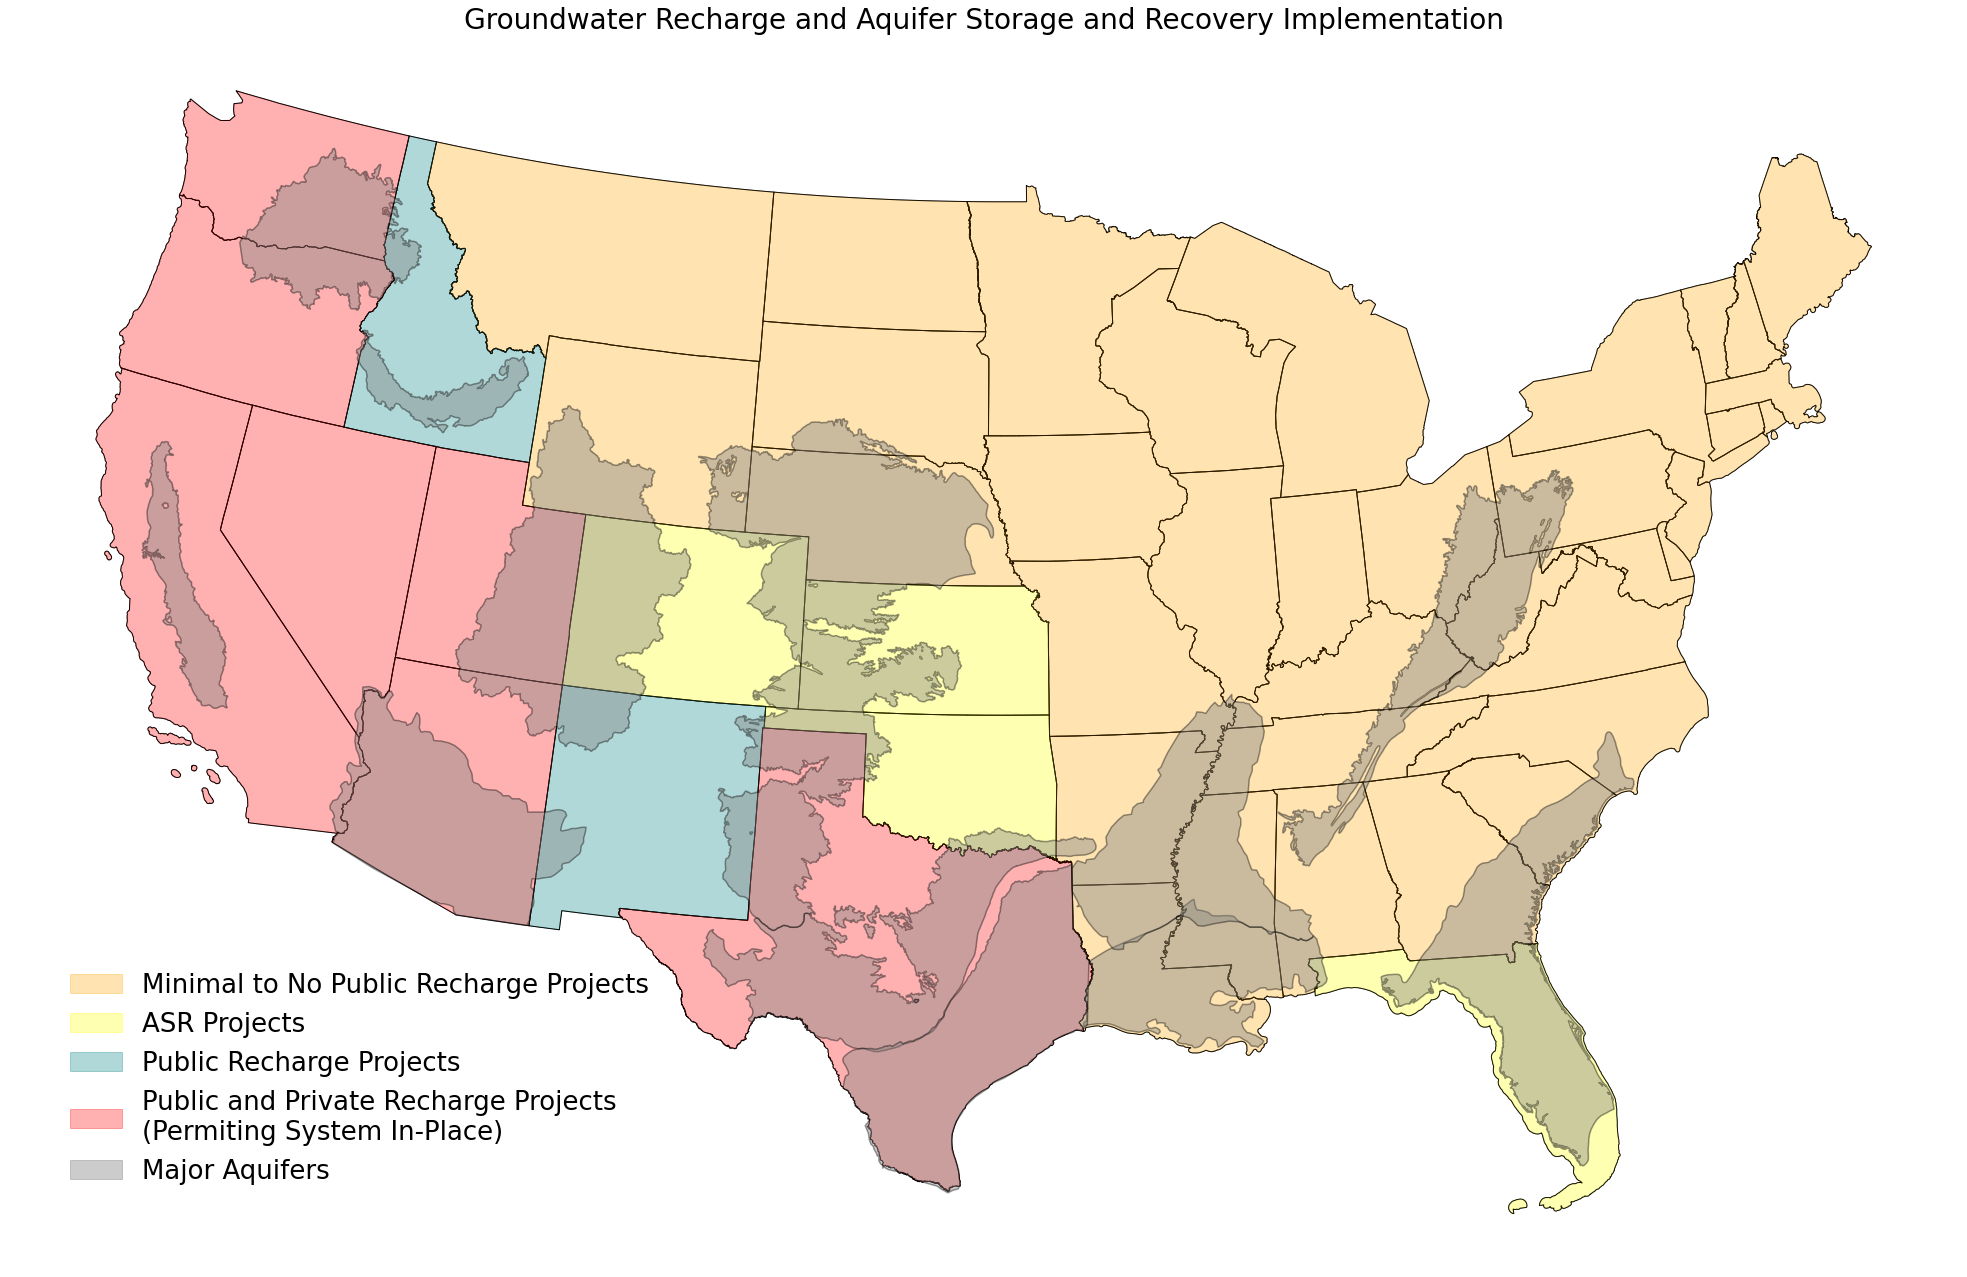

In [83]:
fig, ax = plt.subplots(figsize=(35, 35))
plt.title('Groundwater Recharge and Aquifer Storage and Recovery Implementation', fontsize=28)

lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0)  

lower48_wr[lower48_wr['recharge_type'] == 'none'].plot(facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['recharge_type'] == 'asr'].plot(facecolor='yellow', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['recharge_type'] == 'both_gov'].plot(facecolor='teal', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())
lower48_wr[lower48_wr['recharge_type'] == 'both_permit'].plot(facecolor='red', edgecolor='black', linewidth=1.0, alpha=0.3, ax=plt.gca())

aq_gdf.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='orange', alpha=0.3), 
                Patch(color='yellow', alpha=0.3),
                Patch(color='teal', alpha=0.3),
                Patch(color='red', alpha=0.3),
                Patch(color='grey', alpha=0.4)])  # Add the handle for legend
labels.extend(['Minimal to No Public Recharge Projects', 'ASR Projects', 'Public Recharge Projects', 'Public and Private Recharge Projects \n(Permiting System In-Place)', 'Major Aquifers'])  # Add the label for legend
legend = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.02, 0.05), fontsize=26)
frame = legend.get_frame()  # Get the legend frame
frame.set_linewidth(0)

ax.axis("off")

img_path = f'Saved_Visuals/recharge_implementation_map.png'
fn.save_plot_as_image(img_path, overwrite)

plt.show()